In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from math import radians, sin, cos, acos

In [2]:
ls bart-ridership/

date-hour-soo-dest-2016.csv* station_info.csv*
date-hour-soo-dest-2017.csv*


In [3]:
df_2016 = pd.read_csv('bart-ridership/date-hour-soo-dest-2016.csv')
df_2017 = pd.read_csv('bart-ridership/date-hour-soo-dest-2017.csv')
df_station_info = pd.read_csv('bart-ridership/station_info.csv')

In [4]:
df_2016.head()

,Origin,Destination,Throughput,DateTime
0,12TH,12TH,1,2016-01-01 00:00:00
1,12TH,16TH,1,2016-01-01 00:00:00
2,12TH,24TH,4,2016-01-01 00:00:00
3,12TH,ASHB,4,2016-01-01 00:00:00
4,12TH,BALB,2,2016-01-01 00:00:00


In [5]:
df_2016.shape

(9971582, 4)

In [6]:
df_2017.head()

,Origin,Destination,Throughput,DateTime
0,12TH,19TH,1,2017-01-01 00:00:00
1,12TH,24TH,2,2017-01-01 00:00:00
2,12TH,BAYF,1,2017-01-01 00:00:00
3,12TH,CIVC,5,2017-01-01 00:00:00
4,12TH,COLS,2,2017-01-01 00:00:00


In [7]:
df_2017.shape

(3313625, 4)

In [8]:
df = pd.concat([df_2016, df_2017])

In [9]:
df.shape

(13285207, 4)

In [10]:
df.head()

,Origin,Destination,Throughput,DateTime
0,12TH,12TH,1,2016-01-01 00:00:00
1,12TH,16TH,1,2016-01-01 00:00:00
2,12TH,24TH,4,2016-01-01 00:00:00
3,12TH,ASHB,4,2016-01-01 00:00:00
4,12TH,BALB,2,2016-01-01 00:00:00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13285207 entries, 0 to 3313624
Data columns (total 4 columns):
Origin         object
Destination    object
Throughput     int64
DateTime       object
dtypes: int64(1), object(3)
memory usage: 506.8+ MB


#### df_station cleanup

In [12]:
df_station_info.head()

,Abbreviation,Description,Location,Name
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
1,16TH,"2000 Mission Street, San Francisco CA 94110<br...","-122.419694,37.765062,0",16th St. Mission (16TH)
2,19TH,"1900 Broadway, Oakland CA 94612<br />19th Stre...","-122.268602,37.808350,0",19th St. Oakland (19TH)
3,24TH,"2800 Mission Street, San Francisco CA 94110<br...","-122.418143,37.752470,0",24th St. Mission (24TH)
4,ASHB,"3100 Adeline Street, Berkeley CA 94703<br />As...","-122.270062,37.852803,0",Ashby (ASHB)


In [13]:
df_station_info.shape

(46, 4)

In [14]:
df_station_info['Description'] = df_station_info['Description'].str.replace('<br />','.  ')
df_station_info['Description'].iloc[0]

"1245 Broadway, Oakland CA 94612.  12th St. Oakland City Center Station is in the heart of Downtown Oakland, near historic Old Oakland and Oakland's Chinatown."

#### Parse Logitude and Latitude from 'Location'

In [15]:
longitude = []
latitude = []

for i in range(len(df_station_info['Location'].str.split(','))):
    longitude.append(df_station_info['Location'].str.split(',')[i][0])
    latitude.append(df_station_info['Location'].str.split(',')[i][1])

In [16]:
df_station_info['Longitude'] = pd.Series(longitude)
df_station_info['Latitude'] = pd.Series(latitude)
df_station_info.drop('Location', axis =1, inplace = True)

In [17]:
df_station_info.head()

,Abbreviation,Description,Name,Longitude,Latitude
0,12TH,"1245 Broadway, Oakland CA 94612. 12th St. Oak...",12th St. Oakland City Center (12TH),-122.271450,37.803768
1,16TH,"2000 Mission Street, San Francisco CA 94110. ...",16th St. Mission (16TH),-122.419694,37.765062
2,19TH,"1900 Broadway, Oakland CA 94612. 19th Street ...",19th St. Oakland (19TH),-122.268602,37.808350
3,24TH,"2800 Mission Street, San Francisco CA 94110. ...",24th St. Mission (24TH),-122.418143,37.752470
4,ASHB,"3100 Adeline Street, Berkeley CA 94703. Ashby...",Ashby (ASHB),-122.270062,37.852803


In [18]:
df_location = df_station_info.drop(['Description', 'Name'], axis=1)

In [19]:
df_location.head()

,Abbreviation,Longitude,Latitude
0,12TH,-122.271450,37.803768
1,16TH,-122.419694,37.765062
2,19TH,-122.268602,37.808350
3,24TH,-122.418143,37.752470
4,ASHB,-122.270062,37.852803


In [20]:
df_location['Abbreviation'].unique(), df['Origin'].unique()

(array(['12TH', '16TH', '19TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CAST',
        'CIVC', 'COLS', 'COLM', 'CONC', 'DALY', 'DBRK', 'DELN', 'DUBL',
        'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE', 'MCAR',
        'MLBR', 'MONT', 'NBRK', 'NCON', 'OAKL', 'ORIN', 'PHIL', 'PITT',
        'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN', 'SFIA', 'SHAY',
        'SSAN', 'UCTY', 'WARM', 'WCRK', 'WDUB', 'WOAK'], dtype=object),
 array(['12TH', '16TH', '19TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CAST',
        'CIVC', 'COLM', 'COLS', 'CONC', 'DALY', 'DBRK', 'DELN', 'DUBL',
        'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE', 'MCAR',
        'MLBR', 'MONT', 'NBRK', 'NCON', 'OAKL', 'ORIN', 'PHIL', 'PITT',
        'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN', 'SFIA', 'SHAY',
        'SSAN', 'UCTY', 'WCRK', 'WDUB', 'WOAK', 'WSPR'], dtype=object))

In [21]:
df['Origin'].replace('WSPR', 'WARM', inplace=True)
df['Destination'].replace('WSPR', 'WARM', inplace=True)

In [22]:
Longitude = df_location.drop('Latitude', axis=1).set_index('Abbreviation').T.to_dict('list')
Latitude = df_location.drop('Longitude', axis=1).set_index('Abbreviation').T.to_dict('list')

In [23]:
df['Longitude_Origin']= df['Origin'].apply(lambda x: Longitude[x][0])
df['Latitude_Origin']= df['Origin'].apply(lambda x: Latitude[x][0])

In [24]:
df['Longitude_Dest']= df['Destination'].apply(lambda x: Longitude[x][0])
df['Latitude_Dest']= df['Destination'].apply(lambda x: Latitude[x][0])

In [25]:
df.duplicated().sum()

0

In [26]:
df.head(100)

,Origin,Destination,Throughput,DateTime,Longitude_Origin,Latitude_Origin,Longitude_Dest,Latitude_Dest
0,12TH,12TH,1,2016-01-01 00:00:00,-122.271450,37.803768,-122.271450,37.803768
1,12TH,16TH,1,2016-01-01 00:00:00,-122.271450,37.803768,-122.419694,37.765062
2,12TH,24TH,4,2016-01-01 00:00:00,-122.271450,37.803768,-122.418143,37.752470
3,12TH,ASHB,4,2016-01-01 00:00:00,-122.271450,37.803768,-122.270062,37.852803
4,12TH,BALB,2,2016-01-01 00:00:00,-122.271450,37.803768,-122.447506,37.721585
...,...,...,...,...,...,...,...,...
95,19TH,RICH,1,2016-01-01 00:00:00,-122.268602,37.808350,-122.353099,37.936853
96,19TH,ROCK,4,2016-01-01 00:00:00,-122.268602,37.808350,-122.251371,37.844702
97,19TH,SANL,9,2016-01-01 00:00:00,-122.268602,37.808350,-122.160844,37.721947
98,19TH,SBRN,2,2016-01-01 00:00:00,-122.268602,37.808350,-122.416287,37.637761


In [27]:
df_through = df[df.columns[0:3]]
df_through.head(30)

,Origin,Destination,Throughput
0,12TH,12TH,1
1,12TH,16TH,1
2,12TH,24TH,4
3,12TH,ASHB,4
4,12TH,BALB,2
5,12TH,BAYF,2
6,12TH,CIVC,7
7,12TH,CONC,2
8,12TH,DBRK,6
9,12TH,DELN,2


In [28]:
df_though_sums_origin = pd.DataFrame(df_through.drop('Destination', axis=1).groupby('Origin', as_index=False)['Throughput'].sum())
df_though_sums_dest = pd.DataFrame(df_through.drop('Origin', axis=1).groupby('Destination', as_index=False)['Throughput'].sum())

In [29]:
df_though_sums_origin.rename(columns={'Origin': 'Station','Throughput': 'Origin_Through'}, inplace=True)

In [30]:
df_though_sums_dest.rename(columns={'Destination': 'Station','Throughput': 'Dest_Through'}, inplace=True)

In [31]:
df_though_sums = pd.merge(df_though_sums_origin, df_though_sums_dest, on='Station')
df_though_sums.head()

,Station,Origin_Through,Dest_Through
0,12TH,5322811,5391954
1,16TH,5365000,5384505
2,19TH,5213690,5179220
3,24TH,5459492,5303096
4,ASHB,2297869,2219566


In [32]:
df_though_sums['Total_Through'] = df_though_sums['Origin_Through'] + df_though_sums['Dest_Through']

In [33]:
df_though_sums.head()

,Station,Origin_Through,Dest_Through,Total_Through
0,12TH,5322811,5391954,10714765
1,16TH,5365000,5384505,10749505
2,19TH,5213690,5179220,10392910
3,24TH,5459492,5303096,10762588
4,ASHB,2297869,2219566,4517435


In [34]:
df_though_sums.drop(['Origin_Through', 'Dest_Through'], axis=1, inplace=True)

#### So, the Station with the most Throughput is 'EMBR' - Embarcadero

In [35]:
df_though_sums.sort_values('Total_Through', ascending=False).head(10)

,Station,Total_Through
16,EMBR,34076644
25,MONT,33063895
33,POWL,26593039
8,CIVC,19536703
13,DBRK,10806360
3,24TH,10762588
1,16TH,10749505
0,12TH,10714765
2,19TH,10392910
5,BALB,9070671


#### And the station that is least popular is 'WARM'

In [36]:
df_though_sums.sort_values('Total_Through', ascending=False).tail(10)

,Station,Total_Through
37,SBRN,3081435
21,LAFY,2909804
40,SSAN,2870021
44,WDUB,2866915
39,SHAY,2427717
29,ORIN,2394412
7,CAST,2375800
27,NCON,2162392
28,OAKL,1320157
42,WARM,163509


#### Best time to go from SF to Berkeley and get a seat

In [37]:
df_station_Descriptions = df_station_info.drop(['Name', 'Longitude', 'Latitude'], axis=1)
df_station_Descriptions.head()

,Abbreviation,Description
0,12TH,"1245 Broadway, Oakland CA 94612. 12th St. Oak..."
1,16TH,"2000 Mission Street, San Francisco CA 94110. ..."
2,19TH,"1900 Broadway, Oakland CA 94612. 19th Street ..."
3,24TH,"2800 Mission Street, San Francisco CA 94110. ..."
4,ASHB,"3100 Adeline Street, Berkeley CA 94703. Ashby..."


In [38]:
df_station_in_SF_Berk = pd.DataFrame(df_station_Descriptions['Abbreviation'])
df_station_in_SF_Berk.rename(columns={'Abbreviation': 'Station'}, inplace=True)
df_station_in_SF_Berk['San_Francisco'] = df_station_Descriptions['Description'].str.contains('Francisco').replace([True, False], [1,0])
df_station_in_SF_Berk['Berkeley'] = df_station_Descriptions['Description'].str.contains('Berkeley').replace([True, False], [1,0])


In [39]:
df_station_in_SF_Berk.head()

,Station,San_Francisco,Berkeley
0,12TH,0,0
1,16TH,1,0
2,19TH,0,0
3,24TH,1,0
4,ASHB,0,1


In [40]:
df_berk = df_station_in_SF_Berk[df_station_in_SF_Berk['Berkeley'] == 1].drop('San_Francisco', axis=1)
berkeley_stations = list(df_berk['Station'])

In [41]:
df_sanfran = df_station_in_SF_Berk[df_station_in_SF_Berk['San_Francisco'] == 1].drop('Berkeley', axis=1)
sanfran_stations = list(df_sanfran['Station'])

In [42]:
df_time = df.iloc[:,0:4]

In [43]:
df_time.head()

,Origin,Destination,Throughput,DateTime
0,12TH,12TH,1,2016-01-01 00:00:00
1,12TH,16TH,1,2016-01-01 00:00:00
2,12TH,24TH,4,2016-01-01 00:00:00
3,12TH,ASHB,4,2016-01-01 00:00:00
4,12TH,BALB,2,2016-01-01 00:00:00


In [44]:
df_best_throughput = df_time[(df_time['Destination'].isin(berkeley_stations)) & (df_time['Origin'].isin(sanfran_stations))].sort_values('Throughput', ascending=True)
df_best_throughput.head()

,Origin,Destination,Throughput,DateTime
3313594,WOAK,ASHB,1,2017-05-03 23:00:00
2541381,GLEN,NBRK,1,2016-04-03 10:00:00
2541363,GLEN,ASHB,1,2016-04-03 10:00:00
8560674,SFIA,PLZA,1,2016-11-09 00:00:00
8560688,SSAN,ASHB,1,2016-11-09 00:00:00


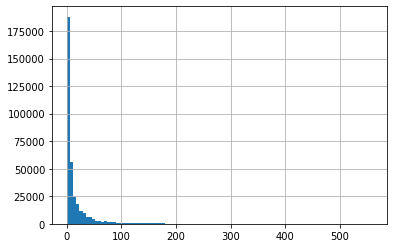

In [45]:
df_best_throughput['Throughput'].hist(bins = 100)
plt.show()

#### If there are at least 200 seats..

In [46]:
#df_best_throughput = df_best_throughput[df_best_throughput['Throughput'] < 200]
#df_best_throughput['Throughput'] = np.log(df_best_throughput['Throughput'])
df_best_throughput.shape

(351477, 4)

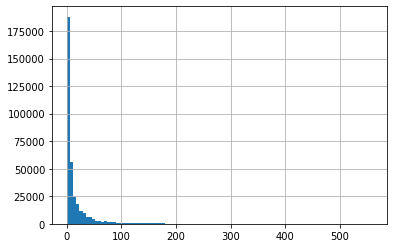

In [47]:
df_best_throughput['Throughput'].hist(bins = 100)
plt.show()

In [48]:
df_best_throughput.head()

,Origin,Destination,Throughput,DateTime
3313594,WOAK,ASHB,1,2017-05-03 23:00:00
2541381,GLEN,NBRK,1,2016-04-03 10:00:00
2541363,GLEN,ASHB,1,2016-04-03 10:00:00
8560674,SFIA,PLZA,1,2016-11-09 00:00:00
8560688,SSAN,ASHB,1,2016-11-09 00:00:00


In [49]:
df_best_throughput.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351477 entries, 3313594 to 5743538
Data columns (total 4 columns):
Origin         351477 non-null object
Destination    351477 non-null object
Throughput     351477 non-null int64
DateTime       351477 non-null object
dtypes: int64(1), object(3)
memory usage: 13.4+ MB


In [50]:
df_best_throughput['DateTime'] = pd.to_datetime(df_best_throughput['DateTime'])

In [51]:
df_best_throughput['day'] = df_best_throughput['DateTime'].apply(lambda x: x.weekday())
df_best_throughput['hour'] = df_best_throughput['DateTime'].apply(lambda x: x.hour)
df_best_throughput['month'] = df_best_throughput['DateTime'].apply(lambda x: x.month)
#df_best_throughput['Throughput'] = np.exp(df_best_throughput['Throughput'])

In [52]:
df_best_throughput.head()

,Origin,Destination,Throughput,DateTime,day,hour,month
3313594,WOAK,ASHB,1,2017-05-03 23:00:00,2,23,5
2541381,GLEN,NBRK,1,2016-04-03 10:00:00,6,10,4
2541363,GLEN,ASHB,1,2016-04-03 10:00:00,6,10,4
8560674,SFIA,PLZA,1,2016-11-09 00:00:00,2,0,11
8560688,SSAN,ASHB,1,2016-11-09 00:00:00,2,0,11


#### Best Time to travel on Sunday

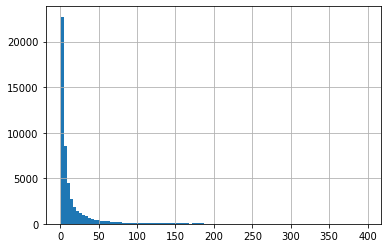

In [53]:
df_best_throughput[df_best_throughput['day'] == 0]['Throughput'].hist(bins=100)
plt.show()

#### Plot Throughput vs Time according to the Day.  Here the red vertical line correspond to 9am and 5pm.

In [54]:
def GetMinVal9to5(df_through_grouped, Day, hour_lowerbound, hour_upperbound):
    return df_through_grouped[(df_through_grouped['day'] == 0) & 
                       (df_through_grouped['hour'] > hour_lowerbound) &
                       (df_through_grouped['hour'] < hour_upperbound)].sort_values('Throughput', ascending=True).iloc[0]['hour']

In [55]:
def Plot_ThroughputvsDay(Day):
    df_through_grouped = df_best_throughput.groupby(['day', 'hour'], as_index=False).sum()
    plt.plot(df_through_grouped[df_through_grouped['day'] == Day]['hour'], df_through_grouped[df_through_grouped['day'] == Day]['Throughput'], '-o')
    plt.axvline(x=9, color='r')
    plt.axvline(x=19, color='r')
    plt.title('Total Throughput on day ' + str(Day))
    plt.xlabel("Time (hrs)")
    plt.ylabel("Throughput (unitless)")
    
    plt.figtext(.2, .7, "Best Time to \nTravel between \n9-7: " + str(GetMinVal9to5(df_through_grouped, Day,9,19)))

    plt.figtext(.2, .55, "Best Time to \nTravel: " + str(GetMinVal9to5(df_through_grouped, Day,0,25)))
    
    plt.show()

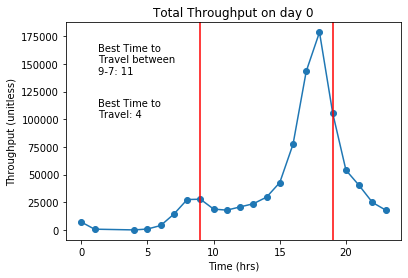

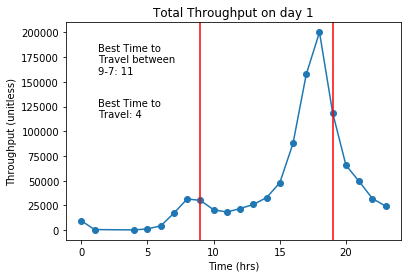

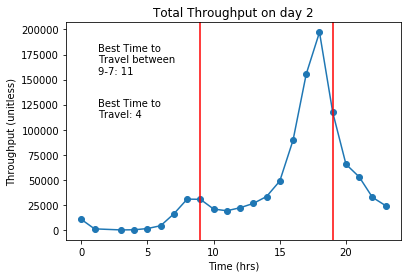

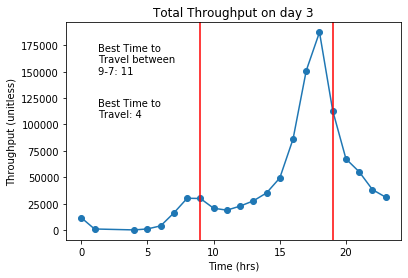

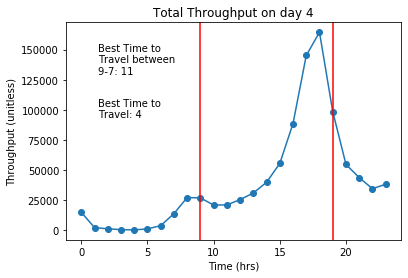

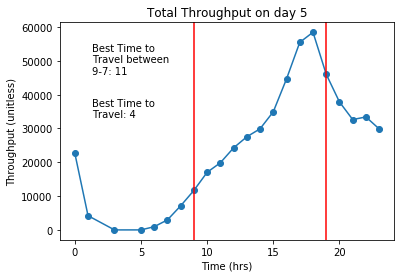

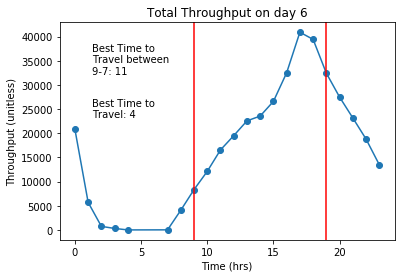

In [56]:
for i in range(7): Plot_ThroughputvsDay(i)

#### Which is the busiest day?   Day2 is the busiest day with a Throughput of almost 1M people.  

In [57]:
df_best_throughput.groupby('day', as_index=False).sum().drop('hour', axis=1).sort_values('Throughput', ascending=False)

,day,Throughput,month
2,2,999909,293904
3,3,998387,288633
1,1,996420,288968
4,4,951459,291929
0,0,878940,278810
5,5,541642,262297
6,6,388995,233559


#### How many people take Bart at night?  If night is considered between 7pm - 7am:

In [58]:
df_best_throughput.head()

,Origin,Destination,Throughput,DateTime,day,hour,month
3313594,WOAK,ASHB,1,2017-05-03 23:00:00,2,23,5
2541381,GLEN,NBRK,1,2016-04-03 10:00:00,6,10,4
2541363,GLEN,ASHB,1,2016-04-03 10:00:00,6,10,4
8560674,SFIA,PLZA,1,2016-11-09 00:00:00,2,0,11
8560688,SSAN,ASHB,1,2016-11-09 00:00:00,2,0,11


In [59]:
df_best_throughput[(df_best_throughput['hour'] < 8) | 
                   (df_best_throughput['hour'] > 19)].groupby('day').sum().drop('hour', axis = 1).sort_values('Throughput', ascending=False)

,Throughput,month
day,,
3,226389,100273
2,208534,103238
4,207821,100983
1,203615,100305
0,164745,94741
5,164633,86079
6,110495,70672


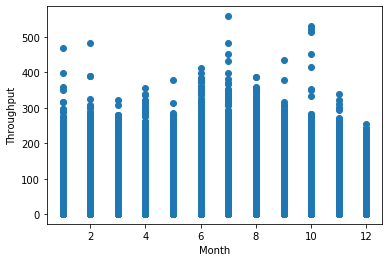

In [60]:
plt.scatter(df_best_throughput['month'], df_best_throughput['Throughput'])
plt.xlabel('Month')
plt.ylabel('Throughput')
plt.show()

#### Straight Line Distance Between Every Station:

In [61]:
df_straight_line = df_station_info

In [62]:
df_straight_line.drop(['Name', 'Description'], axis=1, inplace=True)

In [63]:
df_straight_line.rename(columns={'Abbreviation': 'Station'}, inplace=True)

In [64]:
df_straight_line.head()

,Station,Longitude,Latitude
0,12TH,-122.271450,37.803768
1,16TH,-122.419694,37.765062
2,19TH,-122.268602,37.808350
3,24TH,-122.418143,37.752470
4,ASHB,-122.270062,37.852803


#### Returns distance between two stations in km

In [65]:
def find_distance(df_straight_line, Station1, Station2):
    
    if Station1 == Station2:
        return 0.0
    
    else:
    
        Station1_loc =  df_straight_line[df_straight_line['Station'] == Station1]['Longitude'], df_straight_line[df_straight_line['Station'] == Station1]['Latitude']
        Station2_loc =  df_straight_line[df_straight_line['Station'] == Station2]['Longitude'], df_straight_line[df_straight_line['Station'] == Station2]['Latitude']
    
        Station1_loc = radians(float(Station1_loc[0])), radians(float(Station1_loc[1]))
        Station2_loc = radians(float(Station2_loc[0])), radians(float(Station2_loc[1]))

        return 6371.01 * acos(sin(Station1_loc[1])*sin(Station2_loc[1]) + cos(Station1_loc[1])*cos(Station2_loc[1])*cos(Station1_loc[0] - Station2_loc[0]))
    
    

In [66]:
find_distance(df_straight_line, '12TH', '16TH')

13.720196391359398

In [67]:
df_distance = pd.DataFrame()

for i in df_straight_line['Station']:
    temp_list = []
    
    for j in df_straight_line['Station']:
        temp_list.append(find_distance(df_straight_line, i, j))
        
    temp_series = pd.Series(temp_list, name=i)
    df_distance[i] = temp_series

df_distance.set_index(df_distance.columns.values, inplace=True) 

In [68]:
df_distance.head()

,12TH,16TH,19TH,24TH,ASHB,BALB,BAYF,CAST,CIVC,COLS,...,SANL,SBRN,SFIA,SHAY,SSAN,UCTY,WARM,WCRK,WDUB,WOAK
12TH,0.000000,13.720196,0.567618,14.097949,5.453814,17.972927,17.422013,21.318100,12.818568,8.602737,...,13.315767,22.428287,23.437303,26.644859,21.698762,32.578396,44.493167,21.179252,32.315126,2.084931
16TH,13.720196,0.000000,14.123099,1.406792,16.370249,5.417753,26.873404,31.369835,1.703139,19.629450,...,23.259727,14.158421,16.751682,35.047922,11.411757,40.370176,51.419381,34.647056,43.825057,11.806949
19TH,0.567618,14.123099,0.000000,14.537199,4.944619,18.449772,17.594425,21.423074,13.176725,8.759169,...,13.491808,22.989822,24.004856,26.832833,22.238519,32.780964,44.714908,20.697358,32.267762,2.363314
24TH,14.097949,1.406792,14.537199,0.000000,17.138605,4.296654,26.382193,30.899894,3.051927,19.454229,...,22.878982,12.756124,15.346577,34.367273,10.069648,39.597486,50.525429,35.183392,43.483391,12.280691
ASHB,5.453814,16.370249,4.944619,17.138605,0.000000,21.355050,21.438537,24.836583,15.038513,12.762558,...,17.430829,27.149002,28.448134,30.663654,25.948224,36.657248,48.655796,18.717561,34.527810,5.766866


In [69]:
def find_distance_table(df_distance, Station1, Station2):
    return df_distance[Station1][Station2]

#### Predicting throughput on a given day:

In [70]:
df_recommender = df
df_recommender['DateTime'] = pd.to_datetime(df_recommender['DateTime'])
df_recommender['day'] = df_recommender['DateTime'].apply(lambda x: x.weekday())
df_recommender['hour'] = df_recommender['DateTime'].apply(lambda x: x.hour)
df_recommender['month'] = df_recommender['DateTime'].apply(lambda x: x.month)

In [71]:
df_recommender.drop('DateTime', axis=1, inplace=True)

In [72]:
df_recommender.reset_index(inplace = True, drop= True)

In [73]:
df_recommender.head()

,Origin,Destination,Throughput,Longitude_Origin,Latitude_Origin,Longitude_Dest,Latitude_Dest,day,hour,month
0,12TH,12TH,1,-122.271450,37.803768,-122.271450,37.803768,4,0,1
1,12TH,16TH,1,-122.271450,37.803768,-122.419694,37.765062,4,0,1
2,12TH,24TH,4,-122.271450,37.803768,-122.418143,37.752470,4,0,1
3,12TH,ASHB,4,-122.271450,37.803768,-122.270062,37.852803,4,0,1
4,12TH,BALB,2,-122.271450,37.803768,-122.447506,37.721585,4,0,1


In [74]:
result = [find_distance_table(df_distance, x, y) for x, y in zip(df_recommender['Origin'], df_recommender['Destination'])]

In [75]:
df_recommender['distance'] = pd.Series(result)

In [76]:
df_recommender.head()

,Origin,Destination,Throughput,Longitude_Origin,Latitude_Origin,Longitude_Dest,Latitude_Dest,day,hour,month,distance
0,12TH,12TH,1,-122.271450,37.803768,-122.271450,37.803768,4,0,1,0.000000
1,12TH,16TH,1,-122.271450,37.803768,-122.419694,37.765062,4,0,1,13.720196
2,12TH,24TH,4,-122.271450,37.803768,-122.418143,37.752470,4,0,1,14.097949
3,12TH,ASHB,4,-122.271450,37.803768,-122.270062,37.852803,4,0,1,5.453814
4,12TH,BALB,2,-122.271450,37.803768,-122.447506,37.721585,4,0,1,17.972927


In [77]:
df_recommender.drop(['Longitude_Origin', 'Latitude_Origin', 'Longitude_Dest', 'Latitude_Dest'], axis=1, inplace=True)

In [78]:
df_recommender = pd.get_dummies(df_recommender, drop_first=True)

In [79]:
df_recommender.head()

,Throughput,day,hour,month,distance,Origin_16TH,Origin_19TH,Origin_24TH,Origin_ASHB,Origin_BALB,...,Destination_SANL,Destination_SBRN,Destination_SFIA,Destination_SHAY,Destination_SSAN,Destination_UCTY,Destination_WARM,Destination_WCRK,Destination_WDUB,Destination_WOAK
0,1,4,0,1,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,0,1,13.720196,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,4,0,1,14.097949,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,4,0,1,5.453814,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,4,0,1,17.972927,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
from xgboost import XGBRegressor

In [81]:
def OptimalRegression(dataset, y_name):
    
    r = Ridge()
    l = Lasso()
    e = ElasticNet()
    et = ExtraTreeRegressor()
    gbr = GradientBoostingRegressor()
    ir = IsotonicRegression()
    xgb = XGBRegressor()
    
    x = dataset.drop(y_name,axis = 1) 
    y = dataset[y_name]
    
    x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=0)
    
    algos = [gbr, xgb]
    algo_names = ['Gradient Boost', 'XGBoost']
    
    result = pd.DataFrame(columns = ['Mean Squared Error', 'R2'], index = algo_names)
    
    meansquarederror = []
    r2 = []
    largest_r2 = 0
    bestmodel = 0
    
    for algo in algos:
        algo.fit(x_train,y_train)
        #algo.predict(x_test)
        
        meansquarederror.append(mean_squared_error(y_test, algo.predict(x_test)))
        r2val = r2_score(y_test, algo.predict(x_test))
        r2.append(r2val)
        if(r2val > largest_r2):
            largest_r2 = r2val
            bestmodel = algo
        
    result['Mean Squared Error'] = meansquarederror
    result['R2'] = r2
    
    stats = result.sort_values('R2', ascending = False)
    
    return bestmodel, stats

In [82]:
model, stats = OptimalRegression(df_recommender, 'Throughput')

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:21:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:21:14] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


KeyboardInterrupt: 